# Travel Package Analysis

[Himanshu Goswami](https://github.com/HimGos) - September 2022

***To Travel Is To Live!***

This quote belongs to Hans Christian Andersen and used by a Travel Company who is looking to sell their Travel Packages.

In this Exploratory Data Analysis report I'm going to analyse a dataset provided by one such Travel company and will share my insights/observations at every step. At the end of the report I will provide a detailed conclusion of this report.

To perform a detailed EDA (Exploratory Data Analysis), these 3 steps will be followed :-
- **Profiling the Data** -> This step concludes checking all features(variable/columns), segregating data types, check out for duplicate or missing data etc.
- **Statistics Based Analysis** -> This step is all about interpreting the data using stats. We find out mean, variance, covariance, std. dev etc. to perform various tests like z-test, chi-square test etc.
- **Graph Based Analysis** -> I'd call this step as a MAJOR step. 2 Reasons ... First, we can figure out hidden data just by visualization ... Second, a Data Analyst doesn't always create such report for himself/herself. Often we need to show reports to non-tech people, and we don't want to puzzle them with tech jargon.

Let's begin the analysis!

--------------------------------------------------------------------------------------------------

In [70]:
# Importing Required Libraries

import pandas as pd
import numpy as np
from scipy.stats import normaltest
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading dataset using Pandas

df = pd.read_csv("data/Travel.csv")

In [3]:
# Reading our dataset

print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 4888 rows and 20 columns.


In [4]:
# checking the random records of dataset
df.sample(5)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
418,200418,0,26.0,Self Enquiry,1,29.0,Salaried,Female,2,3.0,Basic,3.0,Married,2.0,0,3,1,1.0,Executive,17886.0
1110,201110,1,35.0,Self Enquiry,1,8.0,Salaried,Female,3,3.0,Basic,5.0,Married,2.0,1,1,1,1.0,Executive,17074.0
3601,203601,0,36.0,Company Invited,1,15.0,Salaried,Female,3,4.0,Deluxe,3.0,Married,3.0,0,5,1,2.0,Manager,22826.0
1611,201611,0,NaN,Self Enquiry,1,35.0,Small Business,Male,2,3.0,Basic,3.0,Single,6.0,0,1,1,0.0,Executive,18452.0
3088,203088,0,32.0,Self Enquiry,1,18.0,Salaried,Male,3,4.0,Basic,3.0,Divorced,5.0,1,3,1,2.0,Executive,21034.0


- Travel Dataset has been successfully loaded with 4888 rows and 20 columns.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 1 : Profiling the Data

In [5]:
# Creating a copy of original dataset, in case something goes wrong.

df_original = df.copy()

In [6]:
# Checking the features of dataset

df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [7]:
# Checking unique values in each column

df.nunique()

CustomerID                  4888
ProdTaken                      2
Age                           44
TypeofContact                  2
CityTier                       3
DurationOfPitch               34
Occupation                     4
Gender                         3
NumberOfPersonVisiting         5
NumberOfFollowups              6
ProductPitched                 5
PreferredPropertyStar          3
MaritalStatus                  4
NumberOfTrips                 12
Passport                       2
PitchSatisfactionScore         5
OwnCar                         2
NumberOfChildrenVisiting       4
Designation                    5
MonthlyIncome               2475
dtype: int64

In [8]:
# There are some misspelled values in Gender column where Female is written as Fe Male. Fixing that too.

df['Gender'] = df['Gender'].replace('Fe Male', 'Female')

In [26]:
# Checking Duplicated Data

df.duplicated().sum()

141

- There are 141 Duplicate Fields!!
- Removing these duplicate fields in next step

In [27]:
df.drop_duplicates(inplace=True)

In [28]:
# More info of features

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4747 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4747 non-null   int64  
 1   Age                       4747 non-null   float64
 2   TypeofContact             4747 non-null   object 
 3   CityTier                  4747 non-null   int64  
 4   DurationOfPitch           4747 non-null   float64
 5   Occupation                4747 non-null   object 
 6   Gender                    4747 non-null   object 
 7   NumberOfPersonVisiting    4747 non-null   int64  
 8   NumberOfFollowups         4747 non-null   float64
 9   ProductPitched            4747 non-null   object 
 10  PreferredPropertyStar     4747 non-null   float64
 11  MaritalStatus             4747 non-null   object 
 12  NumberOfTrips             4747 non-null   float64
 13  Passport                  4747 non-null   int64  
 14  PitchSat

> ### Changing Datatypes & Reducing Memory

In [12]:
# Reducing memory usage of dataset by Dropping unwanted column

df.drop(['CustomerID'], axis=1, inplace=True)

In [13]:
# Changing dtypes of columns to 'category'

# cat_cols = ['CityTier','ProdTaken','NumberOfPersonVisiting','NumberOfChildrenVisiting','PreferredPropertyStar','Passport','PitchSatisfactionScore','OwnCar']
# df[cat_cols] = df[cat_cols].astype('category')


# Checking again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   TypeofContact             4863 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4637 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4843 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4862 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4748 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

- It's better to remove unwanted columns to reduce memory. However, we can also change dtype of known categorical columns to 'category' to save even more space but that doesn't allow us to take median values during 'Missing Data Handling' operation so am skipping that part.

> ### Handling Missing Values

In [14]:
# Getting sum of missing values in each column

df.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

**2 points to take look at here :-**
- First, we have 8 rows with missing values.
- Second, out of these 8, 2 of them are numerical columns which need to be treated separately.

We should not forget that our dataset has customers holding various designations. So using median/mean on all of them won't give us accurate result. Eg. Monthly income of a Manager and Executive are different so they will affect the median value of each other.

In [15]:
# Separating columns having categorical data with numbers

non_numerical_columns = df.select_dtypes(include=np.number).columns.tolist()

# non_numerical_columns.remove('CustomerID')
non_numerical_columns.remove('Age')
non_numerical_columns.remove('MonthlyIncome')

non_numerical_columns

['ProdTaken',
 'CityTier',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'Passport',
 'PitchSatisfactionScore',
 'OwnCar',
 'NumberOfChildrenVisiting']

In [16]:
# Filling the missing values in columns (excluding Age, MonthlyIncome) using median value

df[non_numerical_columns] = df[non_numerical_columns].transform(lambda x: x.fillna(x.median()))

# Filling the missing value of 'TypeofContact' column using mode function since it contains string

df['TypeofContact'] = df['TypeofContact'].transform(lambda x: x.fillna(x.mode()[0]))

In [17]:
# Filling the missing values in Age & MonthlyIncome columns. Here we will consider Designation feature to groupby the customers.

df['Age'] = df.groupby('Designation')['Age'].transform(lambda x: x.fillna(x.median()))
df['MonthlyIncome'] = df.groupby('Designation')['MonthlyIncome'].transform(lambda x: x.fillna(x.median()))

In [18]:
# Checking if our missing values has been fixed!

df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

- Using simple median & mode, we were able to fix the Missing Data in our dataset.


> #### **Summary of Numerical Features**

In [19]:
# Checking the statistical values in our dataset so far

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4888.0,0.188216,0.390925,0.0,0.0,0.0,0.00,1.0
Age,4888.0,37.429828,9.149822,18.0,31.0,36.0,43.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.0,1.0,3.00,3.0
DurationOfPitch,4888.0,15.362930,8.316166,5.0,9.0,13.0,19.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.0,3.0,3.00,5.0
NumberOfFollowups,4888.0,3.711129,0.998271,1.0,3.0,4.0,4.00,6.0
PreferredPropertyStar,4888.0,3.577946,0.797005,3.0,3.0,3.0,4.00,5.0
NumberOfTrips,4888.0,3.229746,1.822769,1.0,2.0,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.0,0.0,1.00,1.0
PitchSatisfactionScore,4888.0,3.078151,1.365792,1.0,2.0,3.0,4.00,5.0


> #### Observations:-
> - As per the dataset, the average age is between 36-37 years.
> - Mostly customers are from Tier 1 city. That means they are good earners.
> - Pitch Satisfaction Score of this company is 3 out of 5. They can work on it.
> - Maximum duration of pitch is 127 mins!
> - On an average, 3 follow-ups are done on clients.
> - Mostly clients prefer 3-Star Property.
> - On an average a client takes 3 trips yearly. 22 being the highest.

> #### Summary of Categorical Features

In [20]:
df.describe(include='object').T

,count,unique,top,freq
TypeofContact,4888,2,Self Enquiry,3469
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,2916
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Designation,4888,5,Executive,1842


In [21]:
# Creating a function to get percentage of unique values in each column

def get_percentage(dataf, col_list):
    for i in col_list:
        print((dataf[i].value_counts()/dataf[i].value_counts().sum())*100, "\n")

In [30]:
# Gettting the percentage of unique values in all non-numeric columns

# numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
non_num_columns = df.select_dtypes(exclude=[np.number]).columns.tolist()

get_percentage(df, non_num_columns)

Self Enquiry       71.097535
Company Invited    28.902465
Name: TypeofContact, dtype: float64 

Salaried          48.304192
Small Business    42.721719
Large Business     8.931957
Free Lancer        0.042132
Name: Occupation, dtype: float64 

Male      59.72193
Female    40.27807
Name: Gender, dtype: float64 

Basic           37.918685
Deluxe          35.475037
Standard        15.041079
Super Deluxe     6.825363
King             4.739836
Name: ProductPitched, dtype: float64 

Married      48.009269
Divorced     20.012640
Single       18.432694
Unmarried    13.545397
Name: MaritalStatus, dtype: float64 

Executive         37.918685
Manager           35.475037
Senior Manager    15.041079
AVP                6.825363
VP                 4.739836
Name: Designation, dtype: float64 



> #### Observations :
> - Self Enquiry is the preferred Type of Contact.
> - Majority of customers are Salaried (48.3%) or Small Business Owners (42.7%).
> - There are more male customers than female.
> - Mostly customers were pitched Basic product followed by Deluxe.
> - 48% of customers are married.
> - Executives & Managers travel the most out of all other Designations.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 2 : Statistics Based Analysis

- Step 2 (Statistic Based Analysis) and Step 3 (Graph Based Analysis) can be done together since graphical representations require statistics often.
- In this EDA, I am doing these steps separately for clarification of steps.

In [41]:
# Getting standard deviation, Median, Mean, Minimum & Maximum values of each column

df.describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,4747.0,0.188329,0.391016,0.0,0.0,0.0,0.0,1.0
Age,4747.0,37.396672,9.164210,18.0,31.0,36.0,43.0,61.0
CityTier,4747.0,1.655151,0.917416,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,4747.0,15.380872,8.330097,5.0,9.0,13.0,19.0,127.0
NumberOfPersonVisiting,4747.0,2.911734,0.724040,1.0,2.0,3.0,3.0,5.0
NumberOfFollowups,4747.0,3.707815,1.004388,1.0,3.0,4.0,4.0,6.0
PreferredPropertyStar,4747.0,3.580156,0.799316,3.0,3.0,3.0,4.0,5.0
NumberOfTrips,4747.0,3.226459,1.821210,1.0,2.0,3.0,4.0,22.0
Passport,4747.0,0.289657,0.453651,0.0,0.0,0.0,1.0,1.0
PitchSatisfactionScore,4747.0,3.051612,1.369584,1.0,2.0,3.0,4.0,5.0


In [44]:
# Checking covariance

df.cov()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,0.152894,-0.518463,0.031246,0.238411,0.002931,0.044925,0.029781,0.019500,0.046575,0.028205,-0.002145,0.003200,-2.678001e+02
Age,-0.518463,83.982736,-0.076833,-0.521109,0.179563,0.075681,-0.128410,2.886763,0.119380,0.169578,0.206692,0.104977,2.266922e+04
CityTier,0.031246,-0.076833,0.841652,0.146331,-0.002843,0.026273,-0.007224,-0.061375,-0.001018,-0.054048,0.001917,0.001218,2.573435e+02
DurationOfPitch,0.238411,-0.521109,0.146331,69.390515,0.428273,0.134697,-0.028218,0.189330,0.129646,-0.018608,-0.005629,0.256121,1.181976e+02
NumberOfPersonVisiting,0.002931,0.179563,-0.002843,0.428273,0.524234,0.236741,0.018981,0.249871,0.004291,-0.014618,0.004382,0.374854,7.571102e+02
NumberOfFollowups,0.044925,0.075681,0.026273,0.134697,0.236741,1.008795,-0.022192,0.244858,0.003530,0.003284,0.004991,0.240626,9.092093e+02
PreferredPropertyStar,0.029781,-0.128410,-0.007224,-0.028218,0.018981,-0.022192,0.638907,0.016294,-0.001625,-0.022153,0.005896,0.022081,1.030986e+00
NumberOfTrips,0.019500,2.886763,-0.061375,0.189330,0.249871,0.244858,0.016294,3.316805,0.012141,-0.014430,-0.014744,0.250654,1.095247e+03
Passport,0.046575,0.119380,-0.001018,0.129646,0.004291,0.003530,-0.001625,0.012141,0.205799,-0.001889,-0.004482,0.006170,7.699255e+00
PitchSatisfactionScore,0.028205,0.169578,-0.054048,-0.018608,-0.014618,0.003284,-0.022153,-0.014430,-0.001889,1.875760,0.047129,0.000882,2.033087e+02


- Covariance is a statistical term that refers to a systematic relationship between two random variables in which a change in the other reflects a change in one variable.

- The covariance value can range from -∞ to +∞, with a negative value indicating a negative relationship and a positive value indicating a positive relationship.


- **Better to check correlation for clear insight**

In [45]:
# Checking correlation in data

df.corr()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
ProdTaken,1.000000,-0.144686,0.087104,0.073195,0.010352,0.114390,0.095285,0.027383,0.262567,0.052667,-0.011289,0.009567,-0.129918
Age,-0.144686,1.000000,-0.009139,-0.006826,0.027062,0.008222,-0.017530,0.172964,0.028715,0.013511,0.046407,0.013393,0.469240
CityTier,0.087104,-0.009139,1.000000,0.019148,-0.004280,0.028513,-0.009851,-0.036734,-0.002446,-0.043015,0.004300,0.001552,0.053211
DurationOfPitch,0.073195,-0.006826,0.019148,1.000000,0.071008,0.016099,-0.004238,0.012480,0.034307,-0.001631,-0.001390,0.035949,0.002692
NumberOfPersonVisiting,0.010352,0.027062,-0.004280,0.071008,1.000000,0.325544,0.032798,0.189493,0.013065,-0.014741,0.012453,0.605330,0.198358
NumberOfFollowups,0.114390,0.008222,0.028513,0.016099,0.325544,1.000000,-0.027643,0.133861,0.007747,0.002387,0.010223,0.280113,0.171718
PreferredPropertyStar,0.095285,-0.017530,-0.009851,-0.004238,0.032798,-0.027643,1.000000,0.011193,-0.004483,-0.020236,0.015177,0.032300,0.000245
NumberOfTrips,0.027383,0.172964,-0.036734,0.012480,0.189493,0.133861,0.011193,1.000000,0.014695,-0.005785,-0.016658,0.160919,0.114079
Passport,0.262567,0.028715,-0.002446,0.034307,0.013065,0.007747,-0.004483,0.014695,1.000000,-0.003041,-0.020330,0.015901,0.003219
PitchSatisfactionScore,0.052667,0.013511,-0.043015,-0.001631,-0.014741,0.002387,-0.020236,-0.005785,-0.003041,1.000000,0.070803,0.000753,0.028159


> #### Observation :- Since +1 & -1 represent strong & weak relation respectively. There is no strong & weak correlation among any of the columns.

In [49]:
# Checking if there is skewness in any of the column

df.skew()

ProdTaken                   1.594828
Age                         0.433039
CityTier                    0.734402
DurationOfPitch             1.846130
NumberOfPersonVisiting      0.028372
NumberOfFollowups          -0.380692
PreferredPropertyStar       0.898797
NumberOfTrips               1.510138
Passport                    0.927727
PitchSatisfactionScore     -0.102405
OwnCar                     -0.484362
NumberOfChildrenVisiting    0.278938
MonthlyIncome               2.049400
dtype: float64

> #### Observation :-
> - A **skewness value of 0** denotes a symmetrical distribution of values. In our data, there is only one column 'Number of Person Visiting' which is quite near to 0.
> - A **negative skewness** indicates an asymmetry in the distribution. That means the tail is longer on left side. Higher the negative, more the possibility of outliers in data. eg. columns like - 'OwnCar' , 'Number of Follow-ups'
> - A **positive skewness** indicates an asymmetry in the distribution. That means the tail is longer on right side. Higher the positive, more the possibility of outliers in data. eg. columns like - 'Duration of Pitch' , 'Number of Trips' , 'Monthly Income'

In [69]:
# Finding out what are the stats of those who have Purchased Product i.e. ProdTaken = 1

df.loc[df['ProdTaken']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
ProdTaken,894.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
Age,894.0,34.644295,9.946153,18.0,28.0,32.0,41.0,60.0
CityTier,894.0,1.821029,0.960219,1.0,1.0,1.0,3.0,3.0
DurationOfPitch,894.0,16.646532,8.301318,6.0,10.0,14.0,22.0,36.0
NumberOfPersonVisiting,894.0,2.927293,0.703753,2.0,2.0,3.0,3.0,4.0
NumberOfFollowups,894.0,3.946309,1.008043,1.0,3.0,4.0,5.0,6.0
PreferredPropertyStar,894.0,3.738255,0.857580,3.0,3.0,3.0,5.0,5.0
NumberOfTrips,894.0,3.329978,2.043112,1.0,2.0,3.0,4.0,20.0
Passport,894.0,0.536913,0.498915,0.0,0.0,1.0,1.0,1.0
PitchSatisfactionScore,894.0,3.201342,1.330055,1.0,2.0,3.0,4.0,5.0


In [68]:
# Finding percentage of people who purchased product

(df.loc[df['ProdTaken']==1]['ProdTaken'].count() / df['ProdTaken'].count())*100

18.832947124499682

> #### Observation :-
> - Only 18% purchased the travel package.
> - Age Group from 32-34 is highly interested in travelling.
> - On an average a customer is being pitched for approx. 15 minutes for a YES!
> - 4 Follow-ups is a good number to make someone purchase product.
> - Majority of customers prefer 3-Star Property.
> - On an average, a client makes 3 trips in a year.
> - An average customer is making $21K in a year.

Before moving to Graph Based Analysis, it would be better to check how many of our charts are gaussian. We will do it using **Normality Test**.

- In normality test we consider numerical features.
- Our main focus is on p-value.
- If **p-value < 0.05** then our data is not Normally Distributed aka **Not Gaussian.**
- If **p-value > 0.05** then our data is Normally Distributed aka **Gaussian.**

In [78]:
# Performing Normal Test & Identifying if data is normally distributed.

num_col = df.select_dtypes(include=[np.number]).columns.tolist()

for i in num_col:
    print(f"{i} : {'Not Gaussian' if normaltest(df[i].values,)[1]<0.05 else 'Gaussian'} | {normaltest(df[i].values)[1]}")

ProdTaken : Not Gaussian | 1.1319748727867456e-241
Age : Not Gaussian | 8.627826698113127e-39
CityTier : Not Gaussian | 0.0
DurationOfPitch : Not Gaussian | 0.0
NumberOfPersonVisiting : Not Gaussian | 1.766394270533766e-83
NumberOfFollowups : Not Gaussian | 2.476310178544693e-34
PreferredPropertyStar : Not Gaussian | 7.5185845630052e-213
NumberOfTrips : Not Gaussian | 0.0
Passport : Not Gaussian | 0.0
PitchSatisfactionScore : Not Gaussian | 0.0
OwnCar : Not Gaussian | 0.0
NumberOfChildrenVisiting : Not Gaussian | 3.2823364495110496e-44
MonthlyIncome : Not Gaussian | 0.0


> #### Observation :-
>
> - Not even a single column is Gaussian.
> - One possible reason is that our data is still having outliers which need to be removed!

In [81]:
# Finding Outlier using Statistical Approach

def outlier_threshold(data, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return lower_fence, upper_fence

for i in num_col:
    print(i, "|", outlier_threshold(df,i,0.25,0.75))

ProdTaken | (0.0, 0.0)
Age | (13.0, 61.0)
CityTier | (-2.0, 6.0)
DurationOfPitch | (-6.0, 34.0)
NumberOfPersonVisiting | (0.5, 4.5)
NumberOfFollowups | (1.5, 5.5)
PreferredPropertyStar | (1.5, 5.5)
NumberOfTrips | (-1.0, 7.0)
Passport | (-1.5, 2.5)
PitchSatisfactionScore | (-1.0, 7.0)
OwnCar | (-1.5, 2.5)
NumberOfChildrenVisiting | (-0.5, 3.5)
MonthlyIncome | (13102.75, 32760.75)


> - We now have lower and upper limits of each numerical column. Any value in a column beyond these limits is an outlier.
> - Before removing these outliers, first we will move to Graph Section to see how the data looks like currently and how the data will look like after removing outliers.

----------------------------------------------------------------------------------------------------------------------------------------

# Step 3 : Graph Based Analysis

> ### Univariate Analysis - Numerical Columns

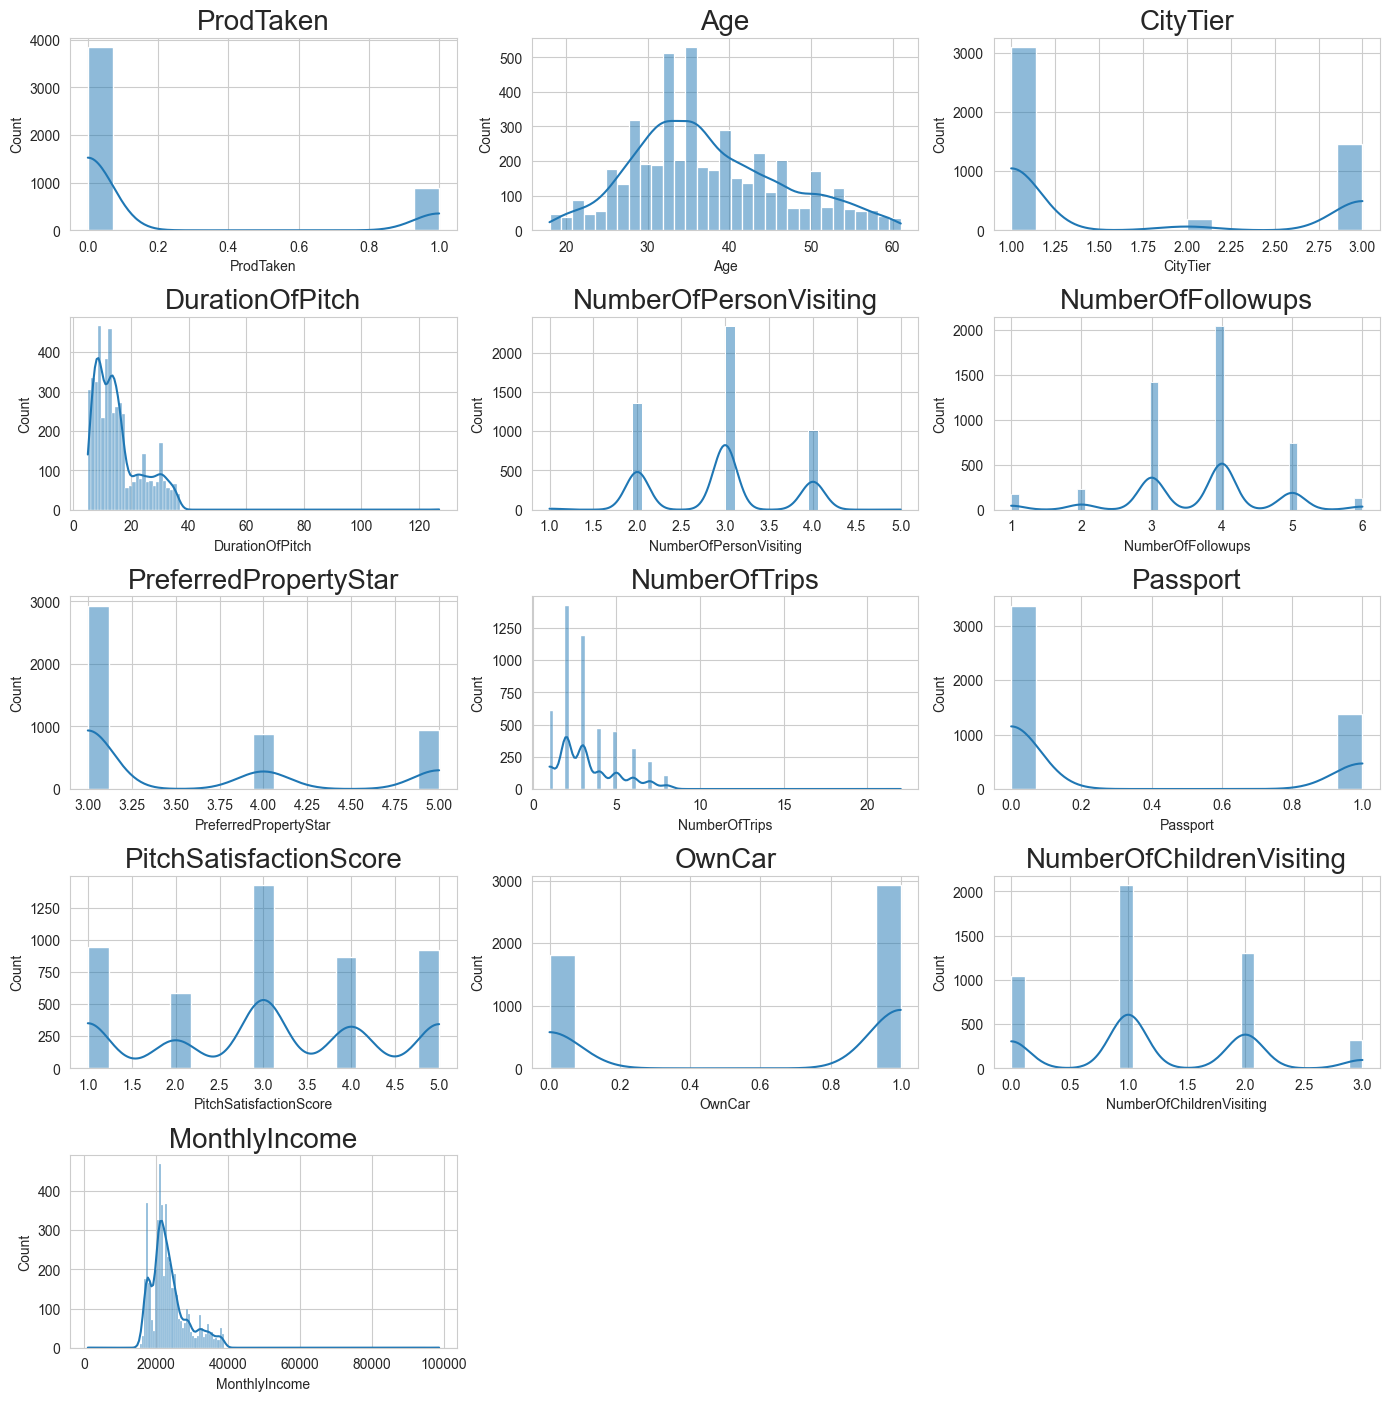

In [87]:
# Plotting histogram along with KDE to study distribution.

# Before Removing Outliers

Uni_num = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(14,50))
for i in range(len(Uni_num)):     #creating a loop that will show the plots for the columns in one plot
    plt.subplot(18,3,i+1)
    sns.histplot(df[Uni_num[i]],kde=True)
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=20)

plt.show()

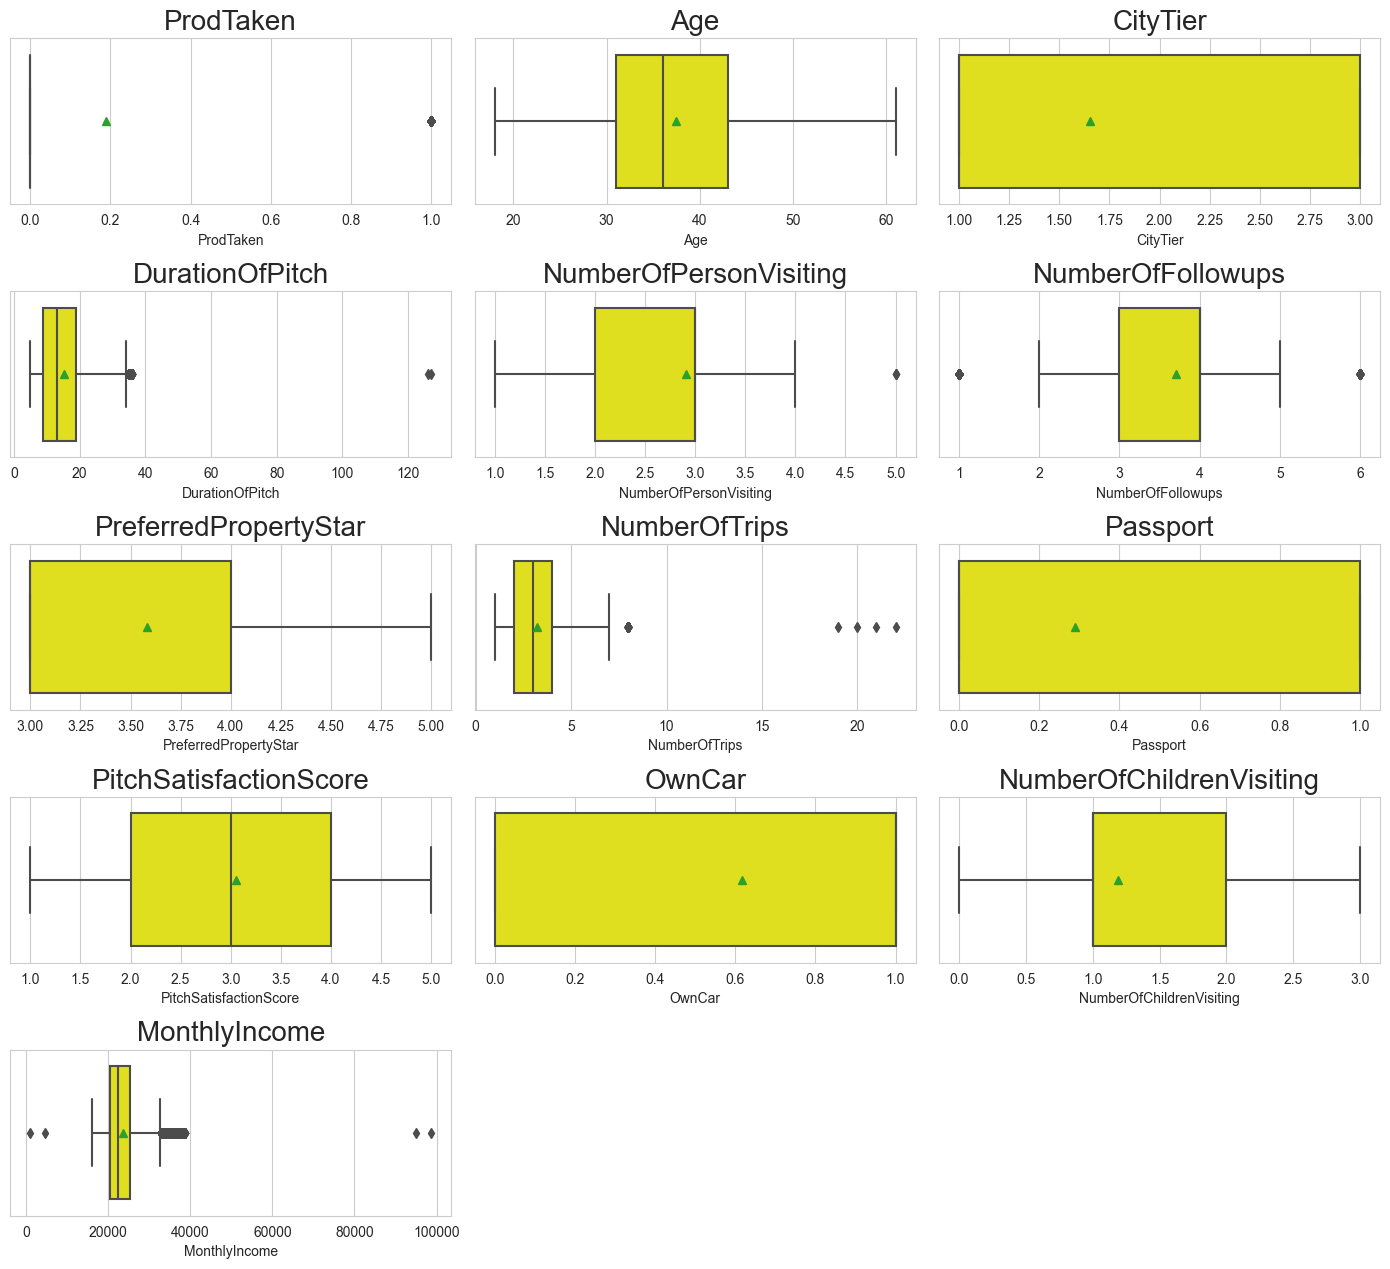

In [93]:
# Plotting Boxplots to study outliers

plt.figure(figsize=(14,25))
for i in range(len(Uni_num)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[Uni_num[i]],showmeans=True, color='yellow')
    plt.tight_layout()
    plt.title(Uni_num[i],fontsize=20)

plt.show()

> #### Observation :- From above 2 types of graphs we can conclude ...
>
> - Age variable is almost normally distributed with absolutely no outlier.
> - DurationOfPitch variable is right skewed that means there are outliers on the right side. Boxplot confirms it by showing outliers beyond 34 upto 120.
> - NumberOfTrips variable is right skewed. Boxplot shows some outliers beyond 7. An average customer is taking 3 trips each year.
> - MonthlyIncome variable is right skewed means it also has outliers. Looking at the boxplot, we can see majority of customers earn between 20k to 30k. This variable has many outliers on the higher end beyond 32,760 and 2 outliers below lower limit of 13K.
> - NumberOfFollowups also has a few outliers on both end. Majority of followups are done between 3 and 5 times.

In [95]:
# Removing Outliers before checking our distribution again

def outlier_threshold(data, column_name, q1_range, q3_range):
    q1 = df[column_name].quantile(q1_range)
    q3 = df[column_name].quantile(q3_range)
    IQR = q3 - q1
    upper_fence = q3 + 1.5*IQR
    lower_fence = q1 - 1.5*IQR
    return lower_fence, upper_fence

for i in num_col:
    lower_fence, upper_fence =  outlier_threshold(df,i,0.25,0.75)
    df.loc[(df[i]<lower_fence) & (df[i]>upper_fence)]

ProdTaken
Age
CityTier
DurationOfPitch
NumberOfPersonVisiting
NumberOfFollowups
PreferredPropertyStar
NumberOfTrips
Passport
PitchSatisfactionScore
OwnCar
NumberOfChildrenVisiting
MonthlyIncome


In [96]:
l,u = outlier_threshold(df,'DurationOfPitch',0.25,0.75)

In [97]:
l

-6.0

In [98]:
u

34.0

In [104]:
df.loc[(df['DurationOfPitch']<l) | (df['DurationOfPitch']>u)]['DurationOfPitch'].replace(df[''])

61      35.0
141     35.0
199     35.0
204     35.0
259     35.0
        ... 
4670    36.0
4722    35.0
4738    36.0
4779    36.0
4832    35.0
Name: DurationOfPitch, Length: 108, dtype: float64

In [106]:
df.loc[df['DurationOfPitch']>34,['DurationOfPitch']].

,DurationOfPitch
61,35.0
141,35.0
199,35.0
204,35.0
259,35.0
...,...
4670,36.0
4722,35.0
4738,36.0
4779,36.0


# Use This to replace outliers with median

median = df.loc[df['Age']<75, 'Age'].median()

df.loc[df.Age > 75, 'Age'] = np.nan

df.fillna(median,inplace=True)


# OR

df["Age"] = np.where(df["Age"] >75, median,df['Age'])